# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nugraha Marga Wiguna
- **Email:** arga4294030303@gmail.com
- **ID Dicoding:** nugraha333

## Menentukan Pertanyaan Bisnis

Pertanyaan berikut adalah hasil dari explorasi pada kedua data
- Bagaimana kecepatan angin memengaruhi jumlah penyewaan?
- Berapa perbandingan pengguna terdaftar dan pengguna casual?
- Bagaiman perbandingan penyewaan pada hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 9999)
pd.set_option('display.max_rows', 9999)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# day.csv - bike sharing counts aggregated on daily basis. Records: 731 days
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

####Assesing day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print(f'Total data terduplikasi => {day_df.duplicated().sum()}')

Total data terduplikasi => 0


In [7]:
day_df.describe(include=[int,float])

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
day_df.describe(include=['O'])

,dteday
count,731
unique,731
top,2011-01-01
freq,1


####Assesing hour_df

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print(f'Total data terduplikasi => {hour_df.duplicated().sum()}')

Total data terduplikasi => 0


In [12]:
hour_df.describe(include=[int,float])

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
hour_df.describe(include=['O'])

,dteday
count,17379
unique,731
top,2011-01-01
freq,24


### Cleaning Data<br>
Kemudian pada bagian ini melakukan 2 hal yaitu:
1. mendenormalisasi variable temp, atemp, hum, dan windspeed menjadi data yang sebenarnya sehingga dapat dianalisis dengan lebih mudah
2. mengganti tipe data dteday

####Cleaning day_df

In [14]:
# fungsi untuk mendenormalisasi data temp dan atemp
def Denorm(val, t_min, t_max):
  # normalisasi dilakukan dengan cara membalik rumus untuk menormalisasi data sebelumnya
  denorm_val = val * (t_max - t_min) + t_min
  return denorm_val

# Menormalisasi variabel temp
day_df['temp'] = Denorm(day_df['temp'], -8, 39)

# normalisasi variabel atemp
day_df['atemp'] = Denorm(day_df['atemp'], -16, 50)

# normalisasi variabel hum
day_df['hum'] = day_df['hum']*100

# normalisasi variabel windspeed
day_df['windspeed'] = day_df['windspeed']*67

In [15]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,8.175849,7.999250,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,9.083466,7.346774,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,1.229108,-3.499270,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,1.400000,-1.999948,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,2.666979,-0.868180,43.6957,12.522300,82,1518,1600


####Cleaning hour_df

In [16]:
# normalisasi variabel temp
hour_df['temp'] = Denorm(hour_df['temp'], -8, 39)

# normalisasi variabel atemp
hour_df['atemp'] = Denorm(hour_df['atemp'], -16, 50)

# normalisasi variabel hum
hour_df['hum'] = hour_df['hum']*100

# normalisasi variabel windspeed
hour_df['windspeed'] = hour_df['windspeed']*67

In [17]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,3.28,3.0014,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,2.34,1.9982,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,2.34,1.9982,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3.28,3.0014,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,3.28,3.0014,75.0,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ... <br>


In [18]:
print(hour_df.head(24)['temp'].sum()/24)
print(hour_df.head(24)['atemp'].sum()/24)

8.175833333333333
7.99925


**Note**<br>
Angka tersebut merupakan temperatur dan temperatur yang terasa di hari pertama pada dataset day_df<br>
Maka dapat disimpulkan bahwa setiap 1 row pada data day_df mewakili rata-rata dari 24 rows data hour_df

In [19]:
season_labels = {
    1 : 'springer',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

weather_labels = {
    1 : 'Cerah',
    2 : 'Berawan',
    3 : 'HujanRingan',
    4 : 'HujanLebat'
}

day_df['season'] = day_df['season'].map(season_labels)
hour_df['season'] = hour_df['season'].map(season_labels)

day_df['weathersit'] = day_df['weathersit'].map(weather_labels)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_labels)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,6,0,Berawan,8.175849,7.999250,80.5833,10.749882,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,Berawan,9.083466,7.346774,69.6087,16.652113,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,Cerah,1.229108,-3.499270,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,Cerah,1.400000,-1.999948,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,Cerah,2.666979,-0.868180,43.6957,12.522300,82,1518,1600


In [20]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,0,6,0,Cerah,3.28,3.0014,81.0,0.0,3,13,16
1,2,2011-01-01,springer,0,1,1,0,6,0,Cerah,2.34,1.9982,80.0,0.0,8,32,40
2,3,2011-01-01,springer,0,1,2,0,6,0,Cerah,2.34,1.9982,80.0,0.0,5,27,32
3,4,2011-01-01,springer,0,1,3,0,6,0,Cerah,3.28,3.0014,75.0,0.0,3,10,13
4,5,2011-01-01,springer,0,1,4,0,6,0,Cerah,3.28,3.0014,75.0,0.0,0,1,1


In [21]:
# jumlah peminjaman perhari
reg_df = day_df.groupby("dteday")['cnt'].sum()
reg_df = reg_df.reset_index()
reg_df.head()

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


In [22]:
# jam dan jumlah peminjaman
hour_df.groupby('hr').agg({'cnt' : 'sum', 'casual' : 'sum', 'registered' : 'sum'})

,cnt,casual,registered
hr,,,
0,39130,7375,31755
1,24164,4709,19455
2,16352,3412,12940
3,8174,1893,6281
4,4428,874,3554
5,14261,1012,13249
6,55132,3017,52115
7,154171,8037,146134
8,261001,15761,245240


In [23]:
# pengaruh cuaca tergadap jumlah penyewaan
day_df.groupby('windspeed')['cnt'].sum()

windspeed
1.500244      4985
2.834381      5117
3.042081      5409
3.042356      1712
3.125550      5087
3.167425      3068
3.375406      5010
3.542344      2425
3.565271      1360
3.834075      4035
3.875669      6536
3.917544      5668
4.000181      5191
4.084206      3740
4.125244      3750
4.167119      4109
4.167956      3811
4.251150      8821
4.292744      5810
4.417256      6565
4.458294      2743
4.458569      7572
4.584194      3068
4.625513      4205
4.708981      7375
4.833769      7582
4.875644      7006
4.876206      7693
4.917519      4075
4.956834      1096
5.000712      4333
5.166819      7713
5.167375      7055
5.174437       920
5.250569      2395
5.251681      5423
5.416950      7499
5.459106      6043
5.459381      7058
5.500144      4186
5.542019      3620
5.542294     14038
5.542575      5634
5.583331      5058
5.584169      3570
5.625206      3485
5.625487      4661
5.626325      8294
5.667919      7765
5.792150      4549
5.957171      4713
6.000406      6230
6.

In [24]:
# pengaruh cuaca tergadap jumlah penyewaan terdaftar
day_df.groupby('weathersit')['registered'].sum()

weathersit
Berawan         827082
Cerah          1811606
HujanRingan      33974
Name: registered, dtype: int64

In [25]:
# pengaruh cuaca tergadap jumlah penyewaan casual
day_df.groupby('weathersit')['casual'].sum()#.reset_index()


weathersit
Berawan        169776
Cerah          446346
HujanRingan      3895
Name: casual, dtype: int64

In [26]:
day_df.groupby('season').agg({'cnt' : 'sum', 'registered' : 'sum', 'casual':'sum'}).reset_index().sort_values(by='cnt')

,season,cnt,registered,casual
1,springer,471348,410726,60622
3,winter,841613,711831,129782
2,summer,918589,715067,203522
0,fall,1061129,835038,226091


In [27]:
# pengaruh hari libur terhadap penyewaan sepeda
day_df.groupby('workingday').agg({'cnt' : 'sum', 'registered' : 'sum', 'casual':'sum'}).reset_index()

,workingday,cnt,registered,casual
0,0,1000269,683537,316732
1,1,2292410,1989125,303285


## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana kecepatan angin memengaruhi jumlah penyewaan??

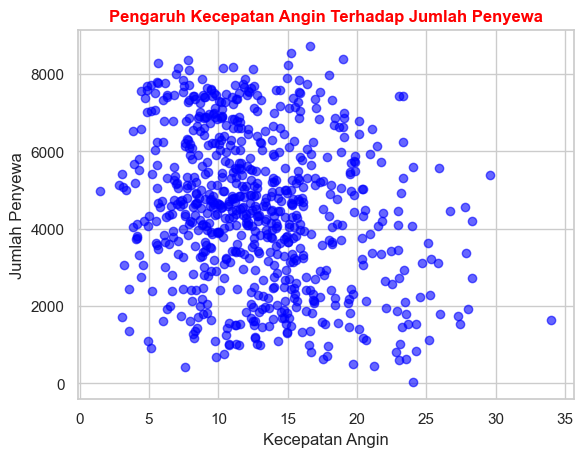

In [83]:
plt.scatter(day_df['windspeed'], day_df['cnt'], color='blue', alpha=0.6)

plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewa')
plt.title('Pengaruh Kecepatan Angin Terhadap Jumlah Penyewa', color='red', fontweight='bold')

plt.show()

Note : Dari scatter plot di atas dapat dilihat bahwa variabel kecepatan angin dan jumlah penyewa tidak memiliki pengaruh.

### Pertanyaan 2 : Bagaimana rata-rata penyewaan per-harinya?

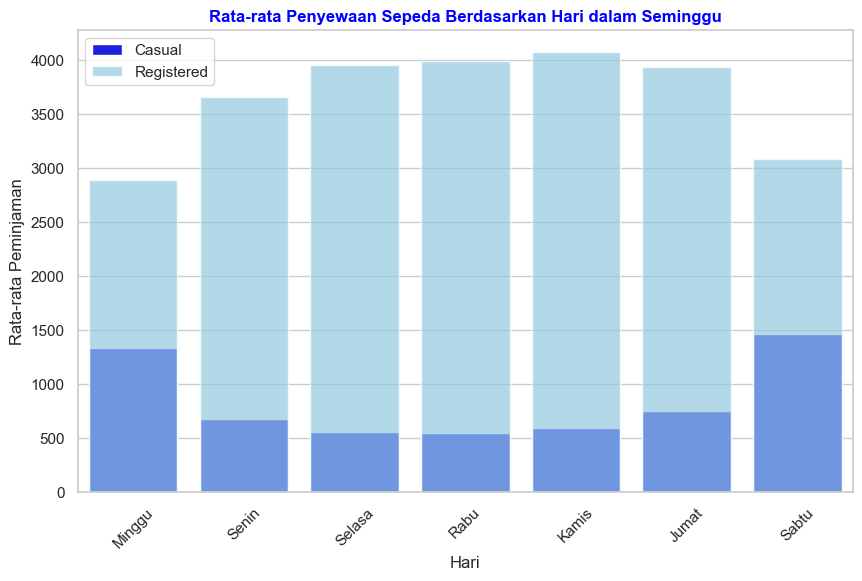

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan data berdasarkan hari dan menghitung rata-rata jumlah penyewa per hari
daily_rentals_by_day = day_df.groupby('weekday')[['casual', 'registered']].mean().reset_index()

# Mengubah angka hari menjadi label yang sesuai
weekday_map = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}
daily_rentals_by_day['weekday'] = daily_rentals_by_day['weekday'].map(weekday_map)

# Plot pengaruh hari terhadap jumlah penyewa
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_rentals_by_day, x='weekday', y='casual', color='blue', label='Casual')
sns.barplot(data=daily_rentals_by_day, x='weekday', y='registered', color='skyblue', label='Registered', alpha=0.7)

# Menambahkan judul dan label
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu', color='blue', fontweight='bold')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Peminjaman')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.xticks(rotation=45)
plt.show()

**Note**
* Hari dengan rata-rata jumlah peminjaman terbanyak adalah hari Kamis
* Rata-rata peminjaman paling sedikit adalah hari minggu
* Rata-rata peminjaman penyewa registered terbanyak adalah hari Sabtu

### 3. Berapa perbandingan pengguna terdaftar dan pengguna casual?

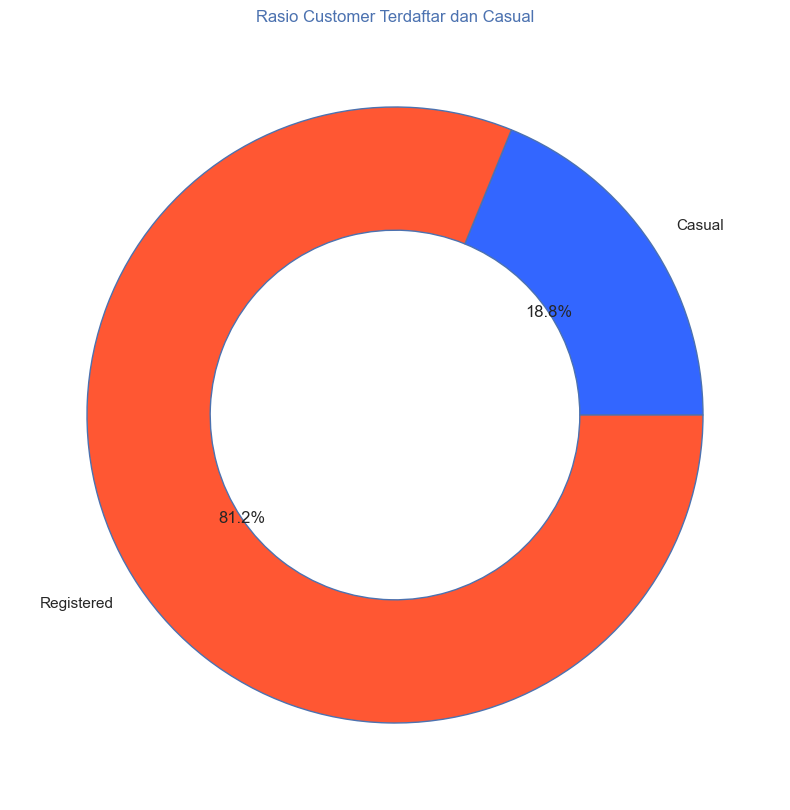

In [55]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")

total_casual = sum(day_df['casual'])
total_registered = sum(day_df['registered'])
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Warna merah dan biru untuk pie chart
colors = ['#3366FF','#FF5733']

# Membuat pie chart dengan warna yang telah ditentukan
plt.pie(data, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.4, edgecolor='b'), colors=colors)

# Menambahkan judul
plt.title('Rasio Customer Terdaftar dan Casual', color='b')

# Menampilkan plot
plt.show()

**Note**

Kesimpulan : Penyewa teregistrasi(registered) jauh lebih banyak daripada yang tidak teregistrasi(casual)

## Kesimpulan

- Conclution pertanyaan 1<br>
Kecepatan angin tidak terlalu memiliki pengaruh terhadap rata-rata jumlah penyewaan.

- Conclution pertanyaan 2<br>
Hari dengan rata-rata jumlah peminjaman terbanyak adalah hari Kamis, rata-rata peminjaman paling sedikit adalah hari minggu, rata-rata peminjaman penyewa registered terbanyak adalah hari Sabtu.

- Conclution pertanyaan 3<br>
Penyewa yang teregistrasi memiliki jumlah penyewaan jauh lebih banyak dibandingkan penyewa casual.